# Predicting Customer Churn - Overfitting

## Setup

### Coding constants

In [1]:
GRAPH_WIDTH = 10
GRAPH_HEIGHT = 5

### Common imports

In [2]:
# Data processing 
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data visualization 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

### Data loading

In [3]:
df = pd.read_csv('data/customer-churn.csv')
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,31953,0,6,313378,161,0,4,3,3,1,1
1,1,36147,0,13,800586,244,0,6,3,3,2,1
2,1,27273,230,0,305049,201,16,15,3,4,3,1
3,0,120070,38,33,788235,780,3,2,3,0,2,0
4,1,29215,208,85,224784,241,21,1,4,3,0,1


In [4]:
df.shape

(20000, 12)

In [5]:
df.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE'],
      dtype='object')

## Data Modeling

In [6]:
def evaluate_performance(model, training, labels):
    labels_pred = model.predict(training)
    n_correct = sum(labels_pred == labels)   
    performance = n_correct / len(labels_pred)
  
    return performance

In [7]:
training_set, test_set = train_test_split(df, test_size=0.2, random_state=15)

print(training_set.shape)
print(test_set.shape)

(16000, 12)
(4000, 12)


In [8]:
training_attr = training_set.loc[:, training_set.columns != 'LEAVE']
training_labels = training_set['LEAVE']

In [9]:
test_attr = test_set.loc[:, test_set.columns != 'LEAVE']
test_labels = test_set['LEAVE']

### Visualizing a fitting curve 

In [10]:
training_performance_values = []
test_performance_values = []
depth_values = []

for depth in range(1, 51, 1):    
    tree_clf = DecisionTreeClassifier(max_depth = depth)
    tree_clf.fit(training_attr, training_labels)
    
    training_performance = evaluate_performance(tree_clf, training_attr, training_labels)
    training_performance_values.append(training_performance)
    
    test_performance = evaluate_performance(tree_clf, test_attr, test_labels)
    test_performance_values.append(test_performance)

    depth_values.append(depth)

In [11]:
fitting_curve = pd.DataFrame({
    'Performance on training data': training_performance_values,
    'Performance on test data': test_performance_values,
}, index= depth_values)

fitting_curve.head()

,Performance on training data,Performance on test data
1,0.621812,0.61200
2,0.646437,0.64325
3,0.662500,0.66425
4,0.688625,0.68825
5,0.695812,0.69100


Text(0, 0.5, 'Accuracy')

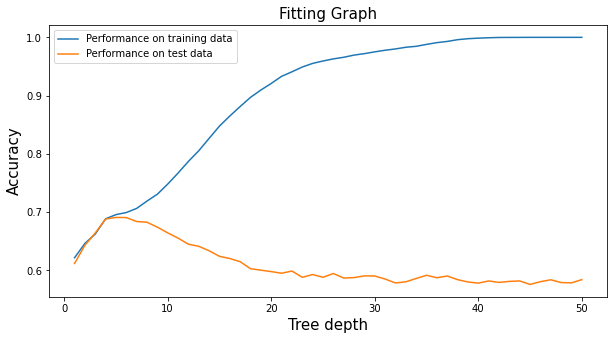

In [12]:
plt.figure(figsize=(GRAPH_WIDTH, GRAPH_HEIGHT))

plot = sns.lineplot(
    data=fitting_curve,
    dashes=False)

plot.set_title('Fitting Graph', fontsize = 15)
plot.set_xlabel("Tree depth", fontsize = 15)
plot.set_ylabel("Accuracy", fontsize = 15)

### Measuring models performance using cross validation  

In [13]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Decision tree with depth = 5

In [14]:
tree_depth_5_clf = DecisionTreeClassifier(max_depth = 5)

In [15]:
scores = cross_val_score(tree_depth_5_clf, training_attr, training_labels, scoring='accuracy', cv=10)
display_scores(scores)

Scores: [0.6925   0.676875 0.6975   0.678125 0.69125  0.7025   0.691875 0.701875
 0.684375 0.67625 ]
Mean: 0.6893125000000001
Standard deviation: 0.009455694382222818


### Decision tree with depth = 10

In [16]:
tree_depth_10_clf = DecisionTreeClassifier(max_depth = 10)

In [17]:
scores = cross_val_score(tree_depth_10_clf, training_attr, training_labels, scoring='accuracy', cv=10)
display_scores(scores)

Scores: [0.66375  0.671875 0.665    0.6575   0.668125 0.684375 0.66625  0.66375
 0.65875  0.64375 ]
Mean: 0.6643125000000001
Standard deviation: 0.009895745613646287


### Logistic regression

In [18]:
logistic_regr_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic_regression", LogisticRegression()),
])

In [19]:
scores = cross_val_score(logistic_regr_clf, training_attr, training_labels, scoring='accuracy', cv=10)
display_scores(scores)

Scores: [0.6025   0.61625  0.640625 0.6125   0.638125 0.63875  0.615625 0.635
 0.61     0.5925  ]
Mean: 0.6201875
Standard deviation: 0.01606882171318109


### Linear support vector machine

In [20]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC()), # SVC stands for support vector classifier
])

In [21]:
scores = cross_val_score(svm_clf, training_attr, training_labels, scoring='accuracy', cv=10)
display_scores(scores)

Scores: [0.6      0.615625 0.638125 0.618125 0.63875  0.6375   0.61375  0.63375
 0.61     0.595625]
Mean: 0.620125
Standard deviation: 0.015267919799370202


## Evaluation

In [35]:
tree_depth_5_clf.fit(training_attr, training_labels)
performance = evaluate_performance(tree_depth_5_clf, test_attr, test_labels)

"Performance of final model - " +\
    f"decision tree classifier depth = {tree_depth_5_clf.get_depth()}: {performance * 100:.2f}%"

'Performance of final model - decision tree classifier depth = 5: 69.10%'